In [1]:
from exponential import *

In [2]:
params=[]
E=[]
N=[]

In [3]:
from scipy.optimize import minimize

def f(x):
    if np.any(x<0):
        return 10000

    return H_func(0,0,[x[0]],[x[1]],[x[2]])

res=minimize(f,x0=[0.03,0.03,1*10**(-8)],method='Nelder-Mead')
print(res)
params.append(res.x)

N.append(1)
E.append(res.fun)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -77.47800025323187
             x: [ 3.184e-02  3.189e-02  9.021e-09]
           nit: 18
          nfev: 35
 final_simplex: (array([[ 3.184e-02,  3.189e-02,  9.021e-09],
                       [ 3.193e-02,  3.190e-02,  9.062e-09],
                       [ 3.183e-02,  3.188e-02,  9.115e-09],
                       [ 3.185e-02,  3.194e-02,  9.109e-09]]), array([-7.748e+01, -7.748e+01, -7.748e+01, -7.748e+01]))


In [4]:
print(params)

[array([3.18433210e-02, 3.18908892e-02, 9.02132396e-09])]


In [5]:
for i in range(100):
    print(i)
    def f(x):
        if np.any(x<0):
            return 10000
        
        theparams=np.expand_dims(np.array(params+[x]).transpose(),-1)

        subspace=Subspace(len(params)+1)

        subspace.set_N_func(N_func)
        subspace.set_H_func(H_func)

        subspace.set_params(1,theparams)

        subspace.make_N_mats_vectorized()
        subspace.make_H_mats_vectorized()
        subspace.find_N_eigens()
        subspace.make_Y_mats()
        subspace.make_invs_sqrt_beta_mats()
        subspace.make_P_mats()
        subspace.find_P_eigens()
        subspace.find_energy_levels()
        return subspace.energy_levels[0,0]

    res=minimize(f,x0=[0.02,0.02,0.004],method='Nelder-Mead')

    params.append(res.x)

    N.append(i+1)
    E.append(res.fun)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68


C:\Users\myles\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\optimize\_optimize.py:899: ComplexWarning: Casting complex values to real discards the imaginary part
  fsim[-1] = fxcc
C:\Users\myles\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\optimize\_optimize.py:833: ComplexWarning: Casting complex values to real discards the imaginary part
  fsim[k] = func(sim[k])
c:\Users\myles\Documents\GitHub\3-particle-quantum-systems\header.py:76: RuntimeWarning: invalid value encountered in sqrt
  invs_sqrt_beta[:,i,i]=1/np.sqrt(self.N_eigenvalues[:,i])


69


LinAlgError: Array must not contain infs or NaNs

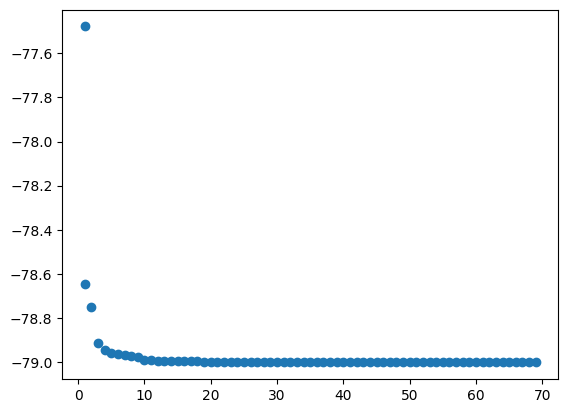

In [6]:
import matplotlib.pyplot as plt

plt.scatter(N,E)

In [7]:
print(E)

[np.float64(-77.47800025323187), np.float64(-78.64407559311282), np.float64(-78.75141363594813), np.float64(-78.91437297094463), np.float64(-78.94611886905267), np.float64(-78.95904356675989), np.float64(-78.96424201104529), np.float64(-78.96734138470252), np.float64(-78.97071193492279), np.float64(-78.97673527706957), np.float64(-78.99023536108668), np.float64(-78.99208076156059), np.float64(-78.99358727197968), np.float64(-78.99443926966434), np.float64(-78.99530283947159), np.float64(-78.99598269764752), np.float64(-78.99654357952228), np.float64(-78.99751372535236), np.float64(-78.99775689296816), np.float64(-78.9987715918404), np.float64(-78.99902822051953), np.float64(-78.99951711838452), np.float64(-78.999593140191), np.float64(-78.99962616980297), np.float64(-78.99984588713096), np.float64(-78.99995464394011), np.float64(-79.00020772964137), np.float64(-79.00025363531174), np.float64(-79.00030676859049), np.float64(-79.0004665476814), np.float64(-79.00093076690942), np.float64(

In [8]:
print(len(params))

70


In [9]:
theparams=np.expand_dims(np.array(params).transpose(),-1)

subspace=Subspace(len(params),verbose=True)

subspace.set_N_func(N_func)
subspace.set_H_func(H_func)

subspace.set_params(1,theparams)

subspace.make_N_mats_vectorized()
subspace.make_H_mats_vectorized()
subspace.find_N_eigens()
subspace.make_Y_mats()
subspace.make_invs_sqrt_beta_mats()
subspace.make_P_mats()
subspace.find_P_eigens()
subspace.find_energy_levels()
print(subspace.energy_levels[0,0])

Constructing the N matrices.
Constructing the H matrices.
Finding the eigenvectors and eigenvalues of the N matrices.
Constructing the Y matrices.
Constructing the inverse square root beta matrices.
Constructing the P matrices.
Finding P eigenvectors and eigenvalues.
Calculating the energy levels.
-79.00231236752705


In [10]:
subspace.find_energy_eigenstates()


Calculating the components of the energy eigenstates.


In [11]:
A=[]

In [12]:
for i in range(len(params)):
    theparams=np.expand_dims(np.array(params[:i+1]).transpose(),-1)

    subspace=Subspace(i+1)

    subspace.set_N_func(N_func)
    subspace.set_H_func(H_func)

    subspace.set_params(1,theparams)

    subspace.make_N_mats_vectorized()
    subspace.make_H_mats_vectorized()
    subspace.find_N_eigens()
    subspace.make_Y_mats()
    subspace.make_invs_sqrt_beta_mats()
    subspace.make_P_mats()
    subspace.find_P_eigens()
    subspace.find_energy_levels()
    subspace.find_energy_eigenstates()
    A.append(list(subspace.energy_eigenstates[0,0]))
    

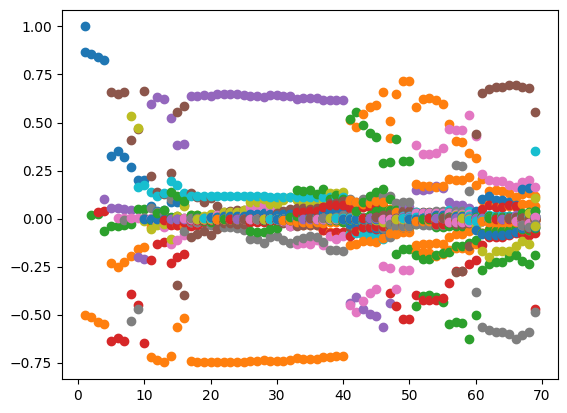

In [16]:
for i in range(len(N)):
    for j in range(len(A[i])):
        plt.scatter(N[i],A[i][j],color=f'C{j}')

plt.show()